In [2]:
"""
Interview Questions:

Q.1) What is the difference between precision and recall?
Ans: Precision is the ratio of true positive predictions to the total predicted positives, indicating how many selected items are relevant. 
Recall is the ratio of true positive predictions to the total actual positives, indicating how many relevant items are selected.

Q.2) What is cross-validation and why is it important in binary classification?
Ans: Cross-validation is a technique used to assess how the results of a statistical analysis will generalize to an independent dataset. 
It involves partitioning the data into subsets, training the model on some subsets (training set) and validating it on the remaining subsets (validation set). 
This process is repeated multiple times to ensure that every data point has been used for both training and validation.

"""

'\nInterview Questions:\n\nQ.1) What is the difference between precision and recall?\nAns: Precision is the ratio of true positive predictions to the total predicted positives, indicating how many selected items are relevant. \nRecall is the ratio of true positive predictions to the total actual positives, indicating how many relevant items are selected.\n\nQ.2) What is cross-validation and why is it important in binary classification?\nAns: Cross-validation is a technique used to assess how the results of a statistical analysis will generalize to an independent dataset. \nIt involves partitioning the data into subsets, training the model on some subsets (training set) and validating it on the remaining subsets (validation set). \nThis process is repeated multiple times to ensure that every data point has been used for both training and validation.\n\n'


================ TRAIN DATA INFO ================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

================ TRAIN DATA DESCRIBE ================

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.0

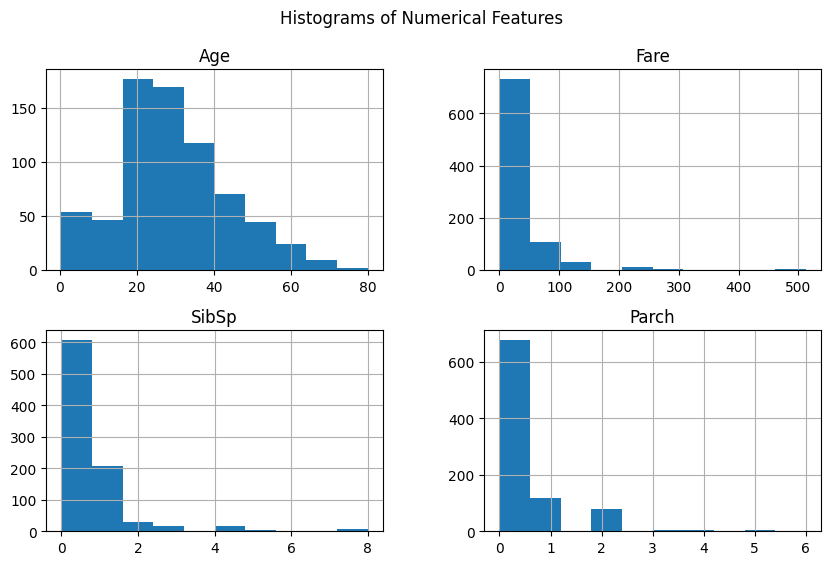

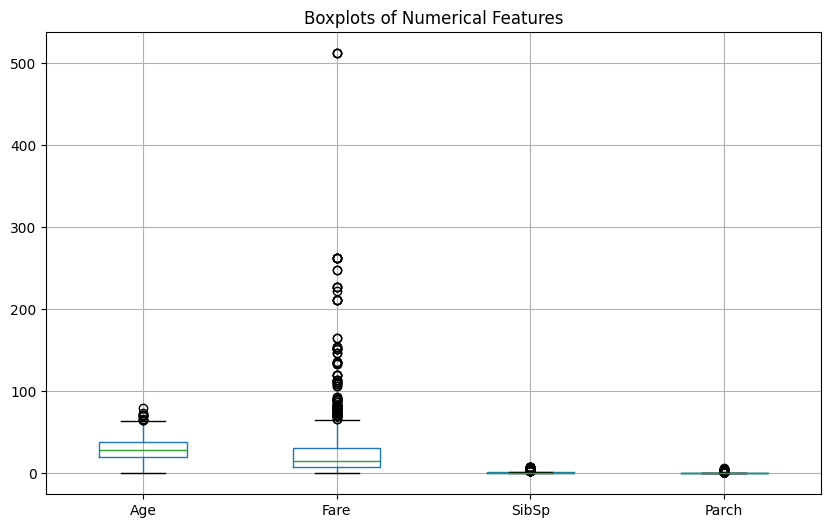

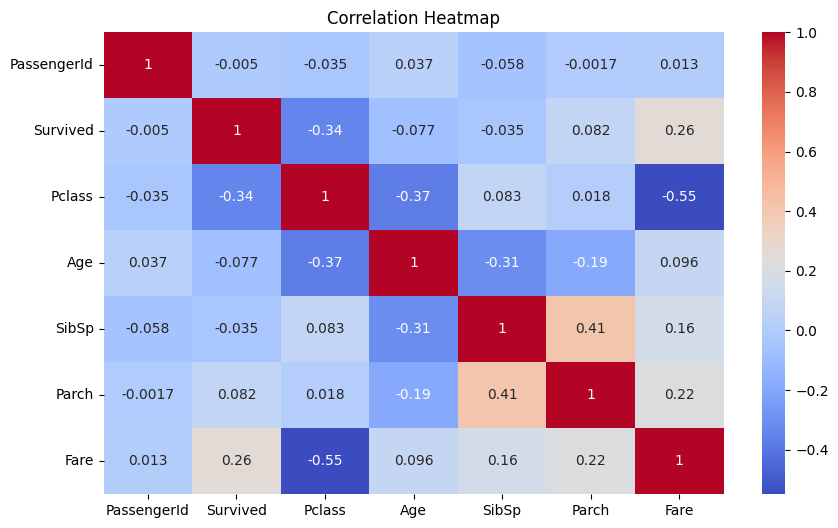


================ EDA OBSERVATIONS ================

1. Fare shows positive correlation with Survived — higher fare passengers survived more.
2. Pclass has negative correlation with survival — lower class passengers had lower survival.
3. Age has weak negative correlation — younger passengers survived slightly more.
4. SibSp and Parch show mild relationship indicating family size impacts survival.
5. Fare distribution is right-skewed with noticeable outliers.


================ MODEL PERFORMANCE ================

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC-AUC: 0.881981981981982


C:\Users\Shreyas Mahale\AppData\Local\Temp\ipykernel_16104\3110623867.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\Shreyas Mahale\AppData\Local\Temp\ipykernel_16104\3110623867.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

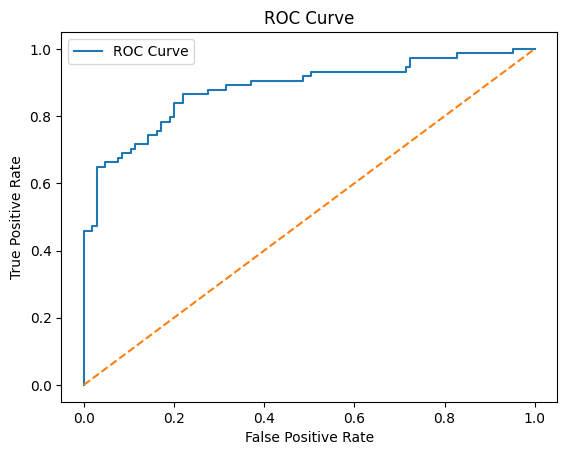


================ FEATURE IMPORTANCE ================

      Feature  Coefficient
4        Fare     0.126511
6  Embarked_Q    -0.046058
3       Parch    -0.096142
7  Embarked_S    -0.189423
2       SibSp    -0.349952
1         Age    -0.396152
0      Pclass    -0.785328
5    Sex_male    -1.277104

Predictions saved as: titanic_test_predictions.csv


In [1]:
# ============================================================
# Logistic Regression on Titanic Dataset (Train + Test)
# Complete EDA + Modeling + Test Predictions in ONE Cell
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1. Load Datasets
# -----------------------------
train_df = pd.read_csv("C:\\Users\\Shreyas Mahale\\Downloads\\Logistic Regression\\Logistic Regression\\Titanic_train.csv")
test_df = pd.read_csv("C:\\Users\\Shreyas Mahale\\Downloads\\Logistic Regression\\Logistic Regression\\Titanic_test.csv")

print("\n================ TRAIN DATA INFO ================\n")
print(train_df.info())

print("\n================ TRAIN DATA DESCRIBE ================\n")
print(train_df.describe())

# -----------------------------
# 2. Exploratory Data Analysis
# -----------------------------
numeric_cols = ["Age","Fare","SibSp","Parch"]

train_df[numeric_cols].hist(figsize=(10,6))
plt.suptitle("Histograms of Numerical Features")
plt.show()

plt.figure(figsize=(10,6))
train_df[numeric_cols].boxplot()
plt.title("Boxplots of Numerical Features")
plt.show()

plt.figure(figsize=(10,6))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("""
================ EDA OBSERVATIONS ================

1. Fare shows positive correlation with Survived — higher fare passengers survived more.
2. Pclass has negative correlation with survival — lower class passengers had lower survival.
3. Age has weak negative correlation — younger passengers survived slightly more.
4. SibSp and Parch show mild relationship indicating family size impacts survival.
5. Fare distribution is right-skewed with noticeable outliers.
""")

# -----------------------------
# 3. Preprocessing Function
# -----------------------------
def preprocess(df):
    df = df.copy()
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Fare"].fillna(df["Fare"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

    df = pd.get_dummies(df, columns=["Sex","Embarked"], drop_first=True)

    drop_cols = ["PassengerId","Name","Ticket","Cabin"]
    for c in drop_cols:
        if c in df.columns:
            df.drop(c, axis=1, inplace=True)

    return df

train_df = preprocess(train_df)
test_processed = preprocess(test_df)

# -----------------------------
# 4. Train/Test Split (from training file only)
# -----------------------------
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Align columns for test set
test_processed = test_processed.reindex(columns=X.columns, fill_value=0)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_scaled = scaler.transform(test_processed)

# -----------------------------
# 5. Logistic Regression
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]

print("\n================ MODEL PERFORMANCE ================\n")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# -----------------------------
# 6. Feature Interpretation
# -----------------------------
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\n================ FEATURE IMPORTANCE ================\n")
print(coef_df)

# -----------------------------
# 7. Predict on Titanic Test File
# -----------------------------
test_predictions = model.predict(test_scaled)

submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_predictions
})

submission.to_csv("titanic_test_predictions.csv", index=False)

print("\nPredictions saved as: titanic_test_predictions.csv")
